About Dataset
Context

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
Content

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

    instant: record index
    dteday : date
    season : season (1:winter, 2:spring, 3:summer, 4:fall)
    yr : year (0: 2011, 1:2012)
    mnth : month ( 1 to 12)
    hr : hour (0 to 23)
    holiday : weather day is holiday or not
    weekday : day of the week
    workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    weathersit :
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp : Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
    atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
    hum: Normalized humidity. The values are divided to 100 (max)
    windspeed: Normalized wind speed. The values are divided to 67 (max)
    casual: count of casual users
    registered: count of registered users
    cnt: count of total rental bikes including both casual and registered

Acknowledgements

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal

Original Source: http://capitalbikeshare.com/system-data
Weather Information: http://www.freemeteo.com
Holiday Schedule: http://dchr.dc.gov/page/holiday-schedule

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
path = '/home/thayyeb/Desktop/Project/bike_rentals/day.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
df.rename({'dteday':'date',"weathersit":'weather_type','cnt':'total_count', 'yr':'year', 'mnth':'month', 'hum':'humidity'}, axis = 1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   date          731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weather_type  731 non-null    int64  
 9   temp          731 non-null    float64
 10  atemp         731 non-null    float64
 11  humidity      731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  total_count   731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [91]:
df['season'].replace([1,2,3,4],['winter', 'spring', 'summer', 'fall'], inplace = True)
df['weather_type'].replace([1,2,3,4],[4,3,2,1], inplace = True)
df.drop('instant',axis =1, inplace = True)

In [92]:
df.nunique()

date            731
season            4
year              2
month            12
holiday           2
weekday           7
workingday        2
weather_type      3
temp            499
atemp           690
humidity        595
windspeed       650
casual          606
registered      679
total_count     696
dtype: int64

In [93]:
df['date'] = pd.to_datetime(df['date'])

In [94]:
df.dtypes

date            datetime64[ns]
season                  object
year                     int64
month                    int64
holiday                  int64
weekday                  int64
workingday               int64
weather_type             int64
temp                   float64
atemp                  float64
humidity               float64
windspeed              float64
casual                   int64
registered               int64
total_count              int64
dtype: object

In [95]:
df.isna().sum()

date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weather_type    0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
total_count     0
dtype: int64

In [96]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
categorical_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_type']

In [97]:
df[numerical_cols].describe()

,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 2, 4)
(3, 2, 5)
(3, 2, 6)


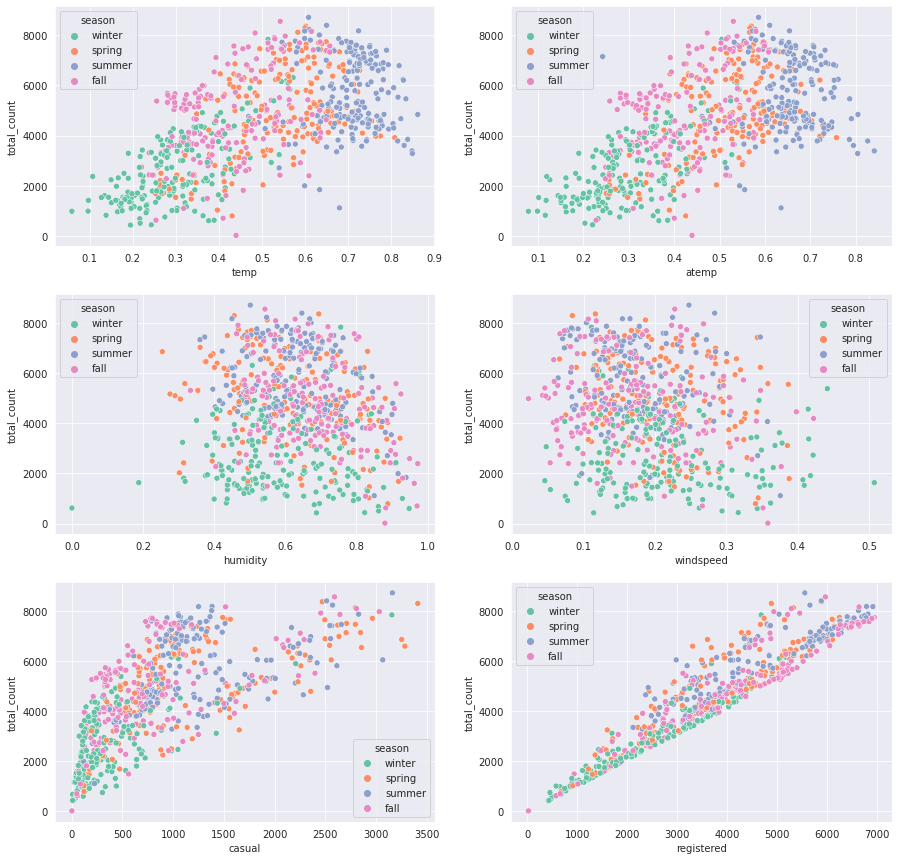

In [98]:
sns.set_style('darkgrid')
rows = len(numerical_cols[:-1])//2
counter = 0
fig, ax = plt.subplots(rows, 2, figsize = (15,15))
for i in range(rows):
    for j in range(2):
        plt.subplot(rows, 2, counter+1)
        print((rows, 2, counter+1))
        sns.scatterplot(data = df, x = numerical_cols[counter], hue = 'season', y = 'total_count', palette = 'Set2')
        counter = counter + 1
        
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='total_count'>

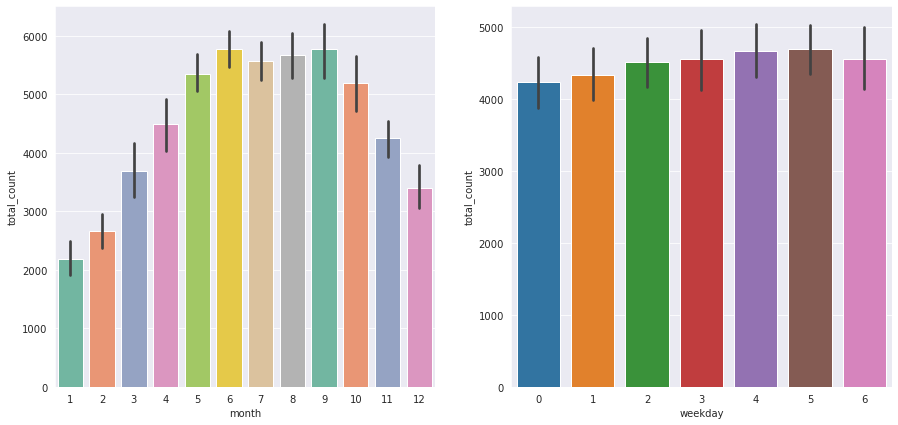

In [99]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(data = df, x = 'month', y='total_count', palette = 'Set2')
plt.subplot(1,2,2)
sns.barplot(data = df, x = 'weekday', y = 'total_count')

<AxesSubplot:xlabel='month', ylabel='total_count'>

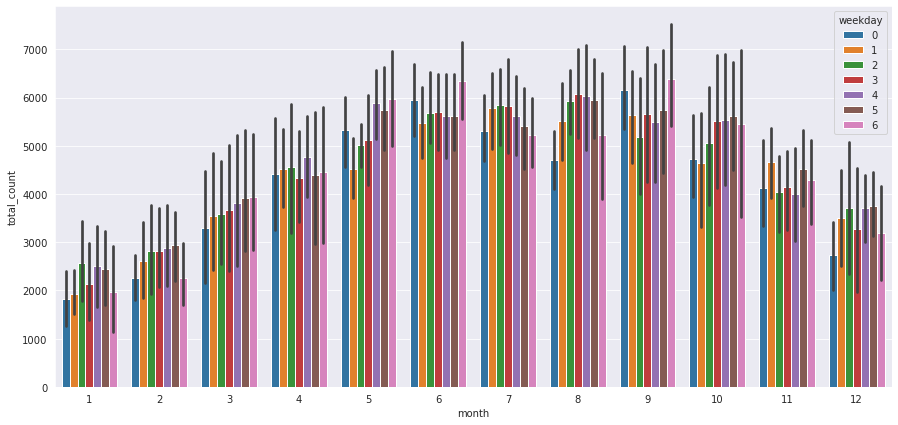

In [100]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x = 'month', y='total_count', hue = 'weekday')

<AxesSubplot:>

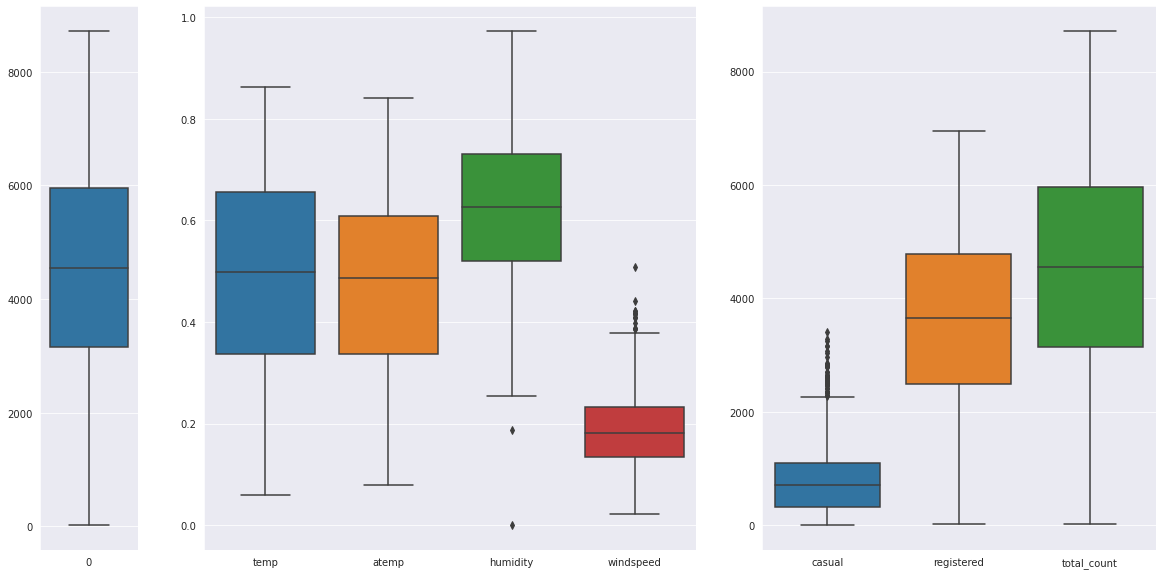

In [101]:
fig, (ax1,ax2,ax3)  = plt.subplots(1,3, figsize = (20,10),gridspec_kw = {'width_ratios' : [1,5,4]})
sns.boxplot(data = df['total_count'], ax = ax1)
sns.boxplot(data = df[numerical_cols[:-3]], ax = ax2)
sns.boxplot(data = df[numerical_cols[-3:]], ax = ax3)

In [102]:
time_series = pd.DataFrame(df[['total_count','registered','casual']])
time_series.set_index(df['date'], inplace = True)

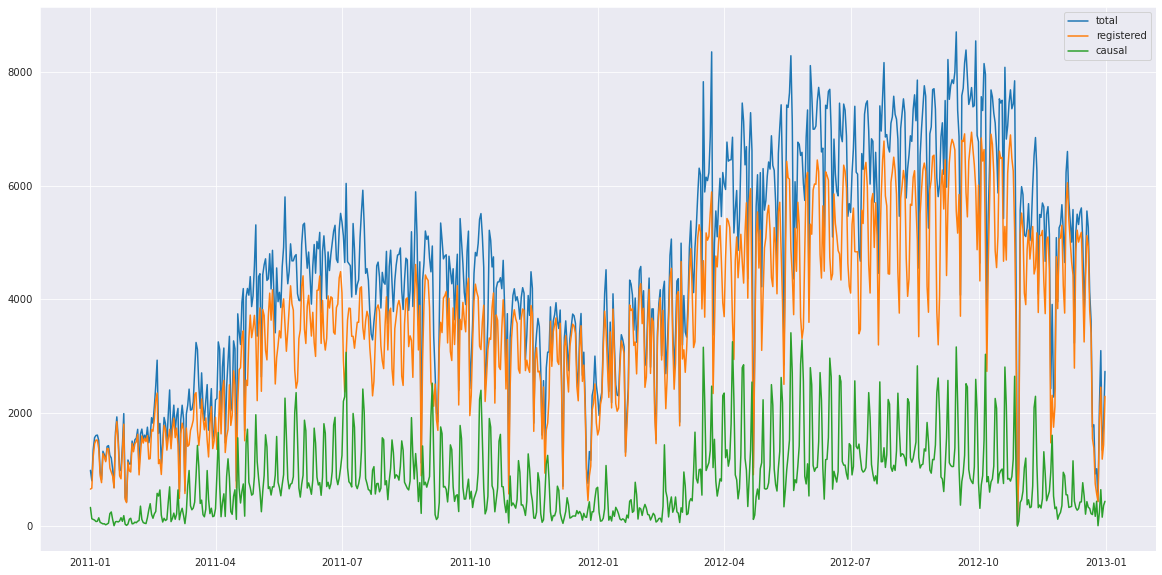

In [103]:
plt.figure(figsize = (20,10))
plt.plot(time_series)
plt.gca().legend(('total','registered','causal'))
plt.show()

Very tempting to remove the outliers <br>
df.loc[df['hum'] == min(df['hum'])]<br>
df.loc[df['windspeed'] == max(df['windspeed'])] 

<AxesSubplot:>

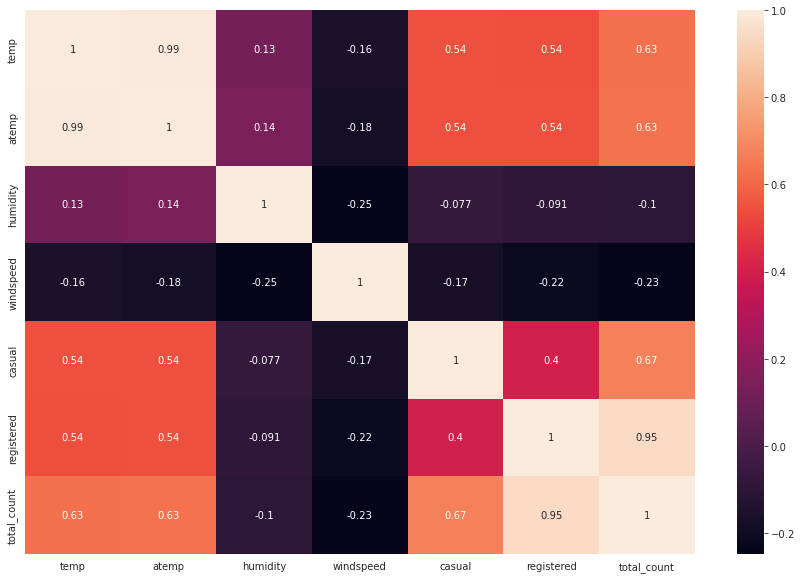

In [104]:
plt.figure(figsize = (15, 10))
sns.heatmap(df[numerical_cols].corr(),annot = True)

In [105]:
X = df.drop(['total_count','registered','casual'],axis = 1)
y = df['total_count']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [108]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer

In [109]:
encoded_categorical_cols = ['workingday', 'holiday', 'year','weather_type'] #already encoded enough 
oh_categorical_cols = [col for col in categorical_cols if col not in encoded_categorical_cols]
oh_df = df[oh_categorical_cols]
oh_df 

,season,month,weekday
0,winter,1,6
1,winter,1,0
2,winter,1,1
3,winter,1,2
4,winter,1,3
...,...,...,...
726,winter,12,4
727,winter,12,5
728,winter,12,6
729,winter,12,0


In [110]:
transformer = make_column_transformer((OneHotEncoder(), oh_df.columns), remainder = 'passthrough')
transformed = transformer.fit_transform(oh_df).toarray()
transformed

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
transformed_df = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())
transformed_df.iloc[0], df.iloc[0]

(onehotencoder__season_fall      0.0
 onehotencoder__season_spring    0.0
 onehotencoder__season_summer    0.0
 onehotencoder__season_winter    1.0
 onehotencoder__month_1          1.0
 onehotencoder__month_2          0.0
 onehotencoder__month_3          0.0
 onehotencoder__month_4          0.0
 onehotencoder__month_5          0.0
 onehotencoder__month_6          0.0
 onehotencoder__month_7          0.0
 onehotencoder__month_8          0.0
 onehotencoder__month_9          0.0
 onehotencoder__month_10         0.0
 onehotencoder__month_11         0.0
 onehotencoder__month_12         0.0
 onehotencoder__weekday_0        0.0
 onehotencoder__weekday_1        0.0
 onehotencoder__weekday_2        0.0
 onehotencoder__weekday_3        0.0
 onehotencoder__weekday_4        0.0
 onehotencoder__weekday_5        0.0
 onehotencoder__weekday_6        1.0
 Name: 0, dtype: float64,
 date            2011-01-01 00:00:00
 season                       winter
 year                              0
 month      

In [112]:
df.drop(oh_df.columns, inplace = True, axis = 1)
df = pd.concat([df,transformed_df], axis = 1)
df

,date,year,holiday,workingday,weather_type,temp,atemp,humidity,windspeed,casual,...,onehotencoder__month_10,onehotencoder__month_11,onehotencoder__month_12,onehotencoder__weekday_0,onehotencoder__weekday_1,onehotencoder__weekday_2,onehotencoder__weekday_3,onehotencoder__weekday_4,onehotencoder__weekday_5,onehotencoder__weekday_6
0,2011-01-01,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2011-01-02,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-03,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-04,0,0,1,1,0.200000,0.212122,0.590435,0.160296,108,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011-01-05,0,0,1,1,0.226957,0.229270,0.436957,0.186900,82,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,0,1,2,0.254167,0.226642,0.652917,0.350133,247,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
727,2012-12-28,1,0,1,2,0.253333,0.255046,0.590000,0.155471,644,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,2012-12-29,1,0,0,2,0.253333,0.242400,0.752917,0.124383,159,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
729,2012-12-30,1,0,0,1,0.255833,0.231700,0.483333,0.350754,364,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
